In [1]:
import cv2 # To do image processing 
import numpy as np
import glob # To manipulate files
from PIL import Image # To display images

In [4]:
# Function to detect eyes:
def detect_open_eye(image, lower_white, upper_white, threshold):
    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the color range for the white of the eye. Transforms the tuples to np.arrays, which is needed.
    lower_white = np.array(lower_white)
    upper_white = np.array(upper_white)

    # Create a mask based on the color range
    mask = cv2.inRange(hsv_image, lower_white, upper_white)

    # Apply the mask to the image
    masked_image = cv2.bitwise_and(image, image, mask=mask)

    # Convert the masked image to grayscale
    gray_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)

    # Calculate the proportion of white pixels in the grayscaled image:
    white_pixel_count = np.count_nonzero(gray_image) # Find the pixels that are white.
    total_pixel_count = gray_image.size # Find the total pixels in the image.
    white_pixel_ratio = white_pixel_count / total_pixel_count

    # Below is commented out to avoid spamming the terminal.
    ##. commented out: print("white_pixel_ratio: " + str(white_pixel_ratio))
    return white_pixel_ratio > threshold # Returns TRUE if the white_pixel_ratio is more than the threshold we set.

Original Image:


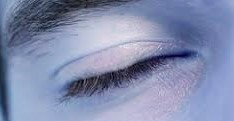

HSV Image:


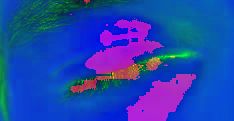

Masked image:


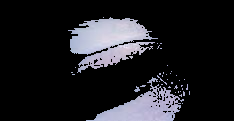

Grey-scaled image:


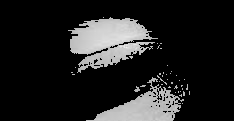

In [2]:
# This part of the code was made for exploring the different steps of the image processing:
test_Img = cv2.imread("/content/drive/MyDrive/CBS - IS. Notes, Files, Books etc./2nd Semester/Artificial Intelligence and Machine Learning/AI Exam/Data/test/Closed/_45.jpg")

print("Original Image:")
print_original_image = Image.fromarray(test_Img) #Using the Image package to assign a viewable image to a new variable.
print_original_image.show()

hsv_Img = cv2.cvtColor(test_Img, cv2.COLOR_BGR2HSV)

print("HSV Image:")
print_HSV_image = Image.fromarray(hsv_Img) #Using the Image package to assign a viewable image to a new variable.
print_HSV_image.show()

# Define the color range for the white of the eye
lower_white = np.array([0, 0, 200])
upper_white = np.array([180, 50, 255])

# Create a mask based on the color range
mask = cv2.inRange(hsv_Img, lower_white, upper_white)

# Apply the mask to the image
masked_image = cv2.bitwise_and(test_Img, test_Img, mask=mask)

print("Masked image:")
print_masked_image = Image.fromarray(masked_image) #Using the Image package to assign a viewable image to a new variable.
print_masked_image.show()

gray_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)

print("Grey-scaled image:")
print_grey_image = Image.fromarray(gray_image)
print_grey_image.show() #Using the Image package to assign a viewable image to a new variable.


In [5]:
# Holds paths in Google Drive - one for open and one for closed eyes. OBS! Will have to be different in VStudio environment!
paths = ["/content/drive/MyDrive/CBS - IS. Notes, Files, Books etc./2nd Semester/Artificial Intelligence and Machine Learning/AI Exam/Data/test/Closed/*.*", 
         "/content/drive/MyDrive/CBS - IS. Notes, Files, Books etc./2nd Semester/Artificial Intelligence and Machine Learning/AI Exam/Data/test/Open/*.*"]

# Define tuples for three types of lower_ & upper_white values (color ranges). This is needed for the manual "gridsearch":
values_sets = [
    ([0, 0, 180], [150, 40, 240]),
    ([10, 10, 200], [180, 50, 250]),
    ([20, 20, 210], [200, 60, 255]),
]

# Define array for different threshold values. This is needed for the manual "gridsearch":
# The threshold 
threshold_values = [0.01, 0.03, 0.05, 0.7, 0.1]

# To save best scores and parameters:
best_score = float('-inf')  # Initialize the best score as negative infinity
best_parameters = None  # Initialize the best parameters as None

# Loop through the different color ranges:
for lower_white, upper_white in values_sets:
  # Loop through the different threshold values: 
    for threshold in threshold_values:
        print("Now testing arrays: " + str(lower_white) + " " + str(upper_white) + " and threshold: " + str(threshold))
        
        #Variable to track correct predictions and total iamges:
        matches = 0
        total_images = 0

      #Loops through both paths. Kind of a weird for loop, which allows us to access each index starting at 1 (will be used when counting matches!):
        for i, path in enumerate(paths, start=1):
          
          # Add and assign the number of all images found in the currect path:
          total_images += len(glob.glob(path))

          # Loops each file found in the folder found in the path:
          for file in glob.glob(path):
            #Use cv2 to read the file:
            eye_image = cv2.imread(file)

            #Calls function to detect open eyes:
            is_open = detect_open_eye(eye_image, lower_white, upper_white, threshold)

          #Displays prediction and logs correct matches:
          #OBS! I commented out the print statements, to not spam the terminal. In smaller tests, it can be nice to see predictions for each image!
            if is_open and i == 1: ## i == 1 means it's looping through closed eye images (first path in paths array.
              #print("Prediction: Eye is open")  
              matches = matches # The match is not correct, so the matches value statys unchange :-)
            elif is_open and i == 2: ## i == 2 means it's looping through open eye images (second path in paths array).
              matches += 1 # The match is correct, so the matches value increases with 1! :-)
              #print("Prediction: Eye is open")
            elif not is_open and i == 1:
              #print("Prediction: Eye is closed")
              matches += 1
            else:
              matches = matches
              #print("Prediction: Eye is closed")

        # For each round of testing in both closed/open eye folders, the accuracy is calculated and displayed:
        print("Total files in folder: " + str(total_images))
        accuracy_percent = matches / total_images * 100
        print("Total correct predictions: " + str(matches) + " ({:.2f}% accuracy)".format(accuracy_percent))

        # The best score and parameters are saved:
        if accuracy_percent > best_score:
          best_score = accuracy_percent
          best_parameters = (threshold, lower_white, upper_white)

# Finally print the best accuracy and parameters:
print("----------")
print("Best Accuracy:", best_score)
print("----------")
print("With Parameters:", best_parameters)
print("Threshold: ", best_parameters[0])
print("Lower_white: ", best_parameters[1])
print("Upper_white: ", best_parameters[2])

Now testing arrays: [0, 0, 180] [150, 40, 240] and threshold: 0.01
Total files in folder: 218
Total correct predictions: 125 (57.34% accuracy)
Now testing arrays: [0, 0, 180] [150, 40, 240] and threshold: 0.03
Total files in folder: 218
Total correct predictions: 114 (52.29% accuracy)
Now testing arrays: [0, 0, 180] [150, 40, 240] and threshold: 0.05
Total files in folder: 218
Total correct predictions: 111 (50.92% accuracy)
Now testing arrays: [0, 0, 180] [150, 40, 240] and threshold: 0.7
Total files in folder: 218
Total correct predictions: 109 (50.00% accuracy)
Now testing arrays: [0, 0, 180] [150, 40, 240] and threshold: 0.1
Total files in folder: 218
Total correct predictions: 105 (48.17% accuracy)
Now testing arrays: [10, 10, 200] [180, 50, 250] and threshold: 0.01
Total files in folder: 218
Total correct predictions: 118 (54.13% accuracy)
Now testing arrays: [10, 10, 200] [180, 50, 250] and threshold: 0.03
Total files in folder: 218
Total correct predictions: 109 (50.00% accurac